# Vertex and Edge Features on Karate Club Network

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

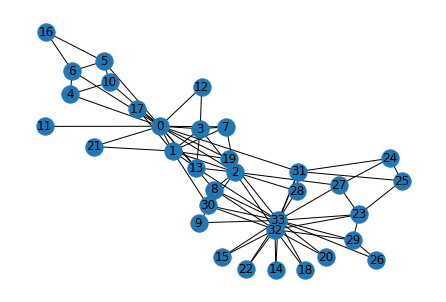

In [2]:
G = nx.karate_club_graph()
nx.draw(G, with_labels = True)

In [3]:
def plot_histogram_of(data, label): 
    n, bins, patches = plt.hist(data, color='skyblue', bins=7 + int(0.0001 * len(data)))
    plt.xticks(bins)
    plt.grid(color='white', lw = 0.5, axis='x')
    plt.title('Histogram - ' + label, loc='center' , fontsize = 15)
    plt.show()

## Problem Number 1

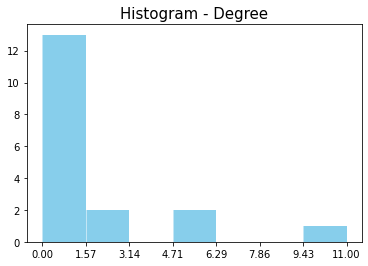

In [4]:
# Degree 
plot_histogram_of(nx.degree_histogram(G), 'Degree')

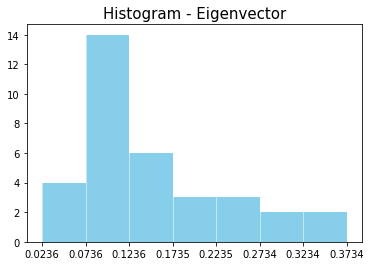

In [5]:
# Eigenvector

plot_histogram_of(nx.eigenvector_centrality(G).values(), 'Eigenvector')

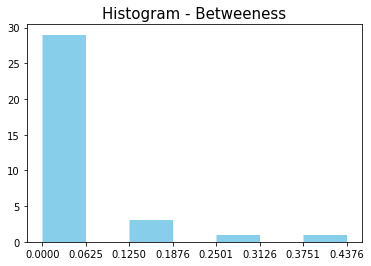

In [6]:
# Betweeness

plot_histogram_of(nx.betweenness_centrality(G).values(), 'Betweeness')

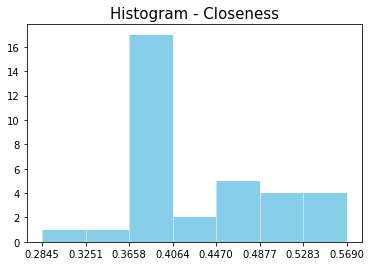

In [7]:
# Closeness

plot_histogram_of(nx.closeness_centrality(G).values(), 'Closeness')

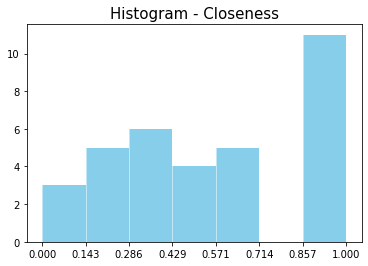

In [8]:
# Clustering

plot_histogram_of(nx.clustering(G).values(), 'Closeness')

## Problem Number 2

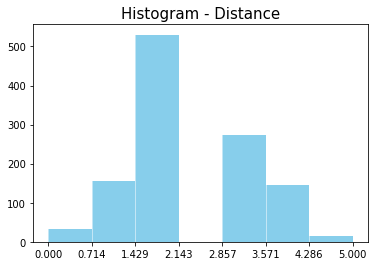

In [9]:
# Distance

dist = np.array([])
for i, f in G.nodes(data=True):
    dist = np.append(dist, list(dict(nx.single_source_shortest_path_length(G, i)).values()))
plot_histogram_of(dist, 'Distance')

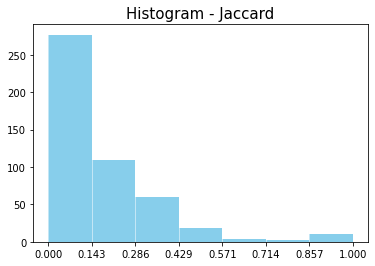

In [10]:
# Jaccard

plot_histogram_of([value for (u, v, value) in list(nx.jaccard_coefficient(G))], 'Jaccard')

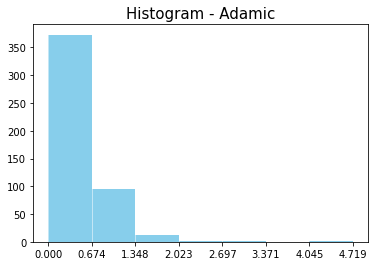

In [11]:
# Adamic-adar

plot_histogram_of([value for (u, v, value) in list(nx.adamic_adar_index(G))], 'Adamic')

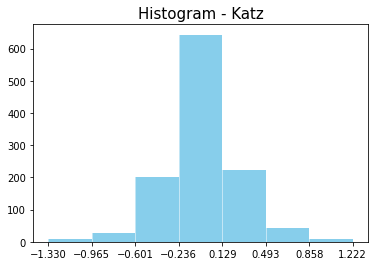

In [12]:
# Katz score

L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.A)
beta = 1/max(e)
I = np.identity(np.array(G.nodes).shape[0])
katz_matrix = np.linalg.inv(I - nx.to_numpy_array(G)*beta) - I
katz_values = katz_matrix.reshape( len(katz_matrix)*len(katz_matrix[0]) )
plot_histogram_of(katz_values, 'Katz')